<a href="https://colab.research.google.com/github/hersan19/Meet_conf/blob/main/Ejemplo_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo algoritmo genético para la solución del problema del viajero

Se instala la biblioteca DEAP (Distributed Evolutionary Algorithms in Python).

Para más información acerca de la biblioteca consultar la documentación en el siguiente link.

https://deap.readthedocs.io/en/master/index.html


In [1]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 35.6 MB/s 


Se importan las bibliotecas que se utilizarán para este ejemplo

In [2]:
import array
import random
import json
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import numpy as np

# **Funciones**

Para la solución del problema se implementa la función "Euclidian", la cual realiza el cálculo de la distancia entre dos puntos.

Especificamente, se realiza el cáluclo de la distancia euclidiana entre dos coordenadas geográficas.

In [3]:
import math
def Euclidian(X, Y):
    return math.sqrt( (float(X[1])-float(Y[1]))**2 + (float(X[0])-float(Y[0]))**2)
    


Se implementa la función "Distances".

Esta función realiza el cálculo de la distancia total de un ciurcuito al pasar por todas las capitales. 
Es decir, se obtiene el costo total de cada uno de los circuitos o posibles soluciones. 

In [4]:
def Distances(cities):
    r= len(cities)
    M=np.zeros((r,r))
    for i in range(r-1):
        for j in range(i+1, r):
            M[i][j] = Euclidian(cities[i], cities[j])
            M[j][i]= M[i][j]
    return M

Se obtienen las coordenadas geográficas de las capitales de cada uno de los estados de la república mexicana.

Cada ciudad cuenta con los valores de "latitud" y "longitud"

In [5]:
url="https://raw.githubusercontent.com/hersan19/Meet_conf/main/ciudades.csv"
df_ciudades=pd.read_csv(url)
datas = list(zip(list(df_ciudades.latitud), list(df_ciudades.longitud)))

Creación de diccionario para relacionar el indice con el nombre de la ciudad

In [6]:
diccionario=df_ciudades["ciudad"]
diccionario=diccionario.to_dict()


# Configuración inicial de DEAP

Se implementa el algoritmo completo utilizando la biblioteca DEAP, la cual permite utilizar una representación para la solución del problema.

La representación es la siguiente:

[2, 7, 8, 1, 3, 9, 4, 5, 6, 0]

In [8]:
# Asignaciones de las distancias
distance_map =Distances(datas)
IND_SIZE = len(datas) # Número de ciudades a recorrer

# Se crea la clase "Individual" usando "creator" como herramienta. 
# La clase "Individual" es una arreglo y tiene como atributo "FitnessMin" el cual será su aptitud.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # El parámetro "weights=-1.0" establece que es una minimización 
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)
# Caja de herramientas para inicializar los individuos

# Toolbox.register crea un alias para una función.
toolbox = base.Toolbox()

# Generador de circuitos.
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)  
# El individuo llamado "individual", toma las características de aptitud.
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) 
# La población es el conjunto de "n" individuos.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Se declara la función encargada de evaluar los individuos.
def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

# Se configuran los parámetros de cruza, mutación, el método de selección y se agrega al toolbox la función encaraga de evaluar a la población.
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)




# Algoritmo general
Se definen los parámetros para el algoritmo genético, así como se agregan elementos al toolbox para guardar las estadísticas del proceso de búsqueda.

In [9]:
def main(): # algoritmo principal
    #random.seed(0)
    # Parámetros del algoritmo genético
    numero_individuos=100
    p_cruza=0.8
    p_mutacion=0.5
    generaciones=100
    # Creación de la población
    pop = toolbox.population(n=numero_individuos)
    # hof (Hall Of Fame) se guarda el mejor individuo que siempre ha existido durante todo el proceso evolutivo
    hof = tools.HallOfFame(1)
    # Se agrega "tools.Statistics" para guardar las estadísticas de las aptitudes del proceso evolutivo
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    # Se configura el algoritmo evolutivo
    pop,log=algorithms.eaSimple(pop, toolbox, p_cruza, p_mutacion, generaciones, stats=stats, 
                        halloffame=hof,verbose=True)
    
    return pop, log,hof

In [10]:
pop,estadisticas,mejor=main()

gen	nevals	avg    	std    	min    	max    
0  	100   	265.596	16.4596	215.395	302.402
1  	90    	255.553	18.9707	197.196	297.767
2  	93    	253.576	19.1846	217.338	306.63 
3  	90    	247.355	16.3733	212.788	295.923
4  	93    	248.05 	19.1323	208.572	307.328
5  	92    	245.556	19.3759	196.269	281.715
6  	91    	242.064	21.2659	189.609	296.696
7  	95    	240.737	23.8571	187.201	294.515
8  	88    	231.878	24.5792	188.787	292.549
9  	83    	227.582	23.6376	181.332	302.68 
10 	94    	226.921	22.2986	184.044	285.186
11 	92    	225.992	24.0342	184.044	304.932
12 	93    	224.599	23.5669	176.818	277.606
13 	85    	219.351	21.1772	184.003	282.807
14 	92    	219.737	20.0429	175.525	273.296
15 	97    	219.983	23.3542	174.69 	284.378
16 	83    	216.093	22.0903	170.758	271.06 
17 	86    	214.063	21.6375	160.45 	283.03 
18 	89    	216.604	23.745 	163.17 	282.395
19 	86    	214.965	22.6849	157.963	284.402
20 	86    	211.532	19.0471	159.263	261.18 
21 	91    	209.041	23.4786	168.464	270.576
22 	90    	

Se obtiene el mejor individuo que se encontró en el proceso de búsqueda

In [11]:
mejor[0]


Individual('i', [4, 25, 1, 2, 24, 17, 21, 3, 22, 30, 26, 5, 19, 29, 28, 18, 6, 31, 0, 23, 27, 12, 20, 10, 14, 16, 11, 15, 9, 13, 7, 8])

Se realiza la decodificación del mejor individuo mediante el uso del diccionario previamente definido. 

De esta manera se obtienen los nombres de cada una de las capitales del mejor recorrido encontrado.

In [12]:
recorrido_nombres=[]
aux=0
for ciudad in mejor[0]:  
  recorrido_nombres.append(diccionario.get(ciudad,ciudad))
recorrido_nombres.append(diccionario.get(mejor[0][0]))
recorrido_nombres

['chihuahua',
 'hermosillo',
 'mexicalli',
 'lapaz',
 'culiacan',
 'tepic',
 'queretaro',
 'campeche',
 'chetumal',
 'merida',
 'villahermosa',
 'tuxtlaGtz',
 'oaxaca',
 'xalapa',
 'tlaxcala',
 'monterrey',
 'Saltillo',
 'zacatecas',
 'aguascalientes',
 'Sanluis',
 'cuidadvictoria',
 'pachuca',
 'puebla',
 'chilpancingo',
 'toluca',
 'cuernavaca',
 'cdmx',
 'morelia',
 'guanajuato',
 'guadalajara',
 'colima',
 'victoriaDurango',
 'chihuahua']

En este apartado se decodifica el mejor individuo en términos de las coordenadas geograficas de cada una de las capitales, con el fin de obtener colocarlas en el mapa.

In [13]:
recorrido=[]
for i in range(32):
  latitud=df_ciudades.iloc[mejor[0][i]]["latitud"]
  longitud=df_ciudades.iloc[mejor[0][i]]["longitud"]
  recorrido.append((latitud,longitud))

In [14]:
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()
# Se agregan los puntos que representan la ubicación de las capitales
fig.add_trace(go.Scattergeo(
    #locations = ["Mexico"],
    #locationmode = 'country names',
    lon=df_ciudades["longitud"],
    lat=df_ciudades["latitud"],
    hoverinfo="text",
    hovertext=df_ciudades["ciudad"],
    #text=df_ciudades["ciudad"],
    mode="markers",
    marker = dict(size=2,color='rgb(255,0,0)',line=dict(width=3,color='rgba(68,68,0)'))))

# Ciclo para realizar la unión de los puntos de acuerdo con el mejor individuo 
for i in range(31):
  fig.add_trace(go.Scattergeo(
      lat=[recorrido[i][0],recorrido[i+1][0]],
      lon=[recorrido[i][1],recorrido[i+1][1]],
      mode="lines",
      line=dict(width=1,color="blue"),
  ))
fig.add_trace(go.Scattergeo(
    lat=[recorrido[-1][0],recorrido[0][0]],
    lon=[recorrido[-1][1],recorrido[0][1]],
    mode="lines",
    line=dict(width=1,color="blue"),
  ))

fig.update_layout(title_text="Mejor recorrido",showlegend=True,
                  geo =dict(
                      #showcountries=True,
                      scope="north america",
                      projection_type ='conic equal area',                      
                      showland = True,
                      #landcolor='rgb(243,243,243)',
                      #countrycolor='rgb(204,204,204)',
                  ), width=1800, height=1400)
fig.show()

Se imprimen los resultados obtenidos junto con la gráfica del proceso evolutivo.

En la gráfica se muestran el promedio de aptitud de toda la población (línea azul), la máxima aptitud (línea naranja) y la máxima (línea verde)

Mejor individuo es: Individual('i', [4, 25, 1, 2, 24, 17, 21, 3, 22, 30, 26, 5, 19, 29, 28, 18, 6, 31, 0, 23, 27, 12, 20, 10, 14, 16, 11, 15, 9, 13, 7, 8])
['chihuahua', 'hermosillo', 'mexicalli', 'lapaz', 'culiacan', 'tepic', 'queretaro', 'campeche', 'chetumal', 'merida', 'villahermosa', 'tuxtlaGtz', 'oaxaca', 'xalapa', 'tlaxcala', 'monterrey', 'Saltillo', 'zacatecas', 'aguascalientes', 'Sanluis', 'cuidadvictoria', 'pachuca', 'puebla', 'chilpancingo', 'toluca', 'cuernavaca', 'cdmx', 'morelia', 'guanajuato', 'guadalajara', 'colima', 'victoriaDurango', 'chihuahua']
con aptitud de : (102.16727663629261,)


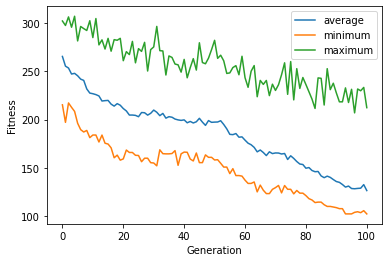

In [15]:
print("Mejor individuo es: %s\n%s\ncon aptitud de : %s" % (mejor[0],recorrido_nombres, mejor[0].fitness))
    
import matplotlib.pyplot as plt
gen, avg, min_, max_ = estadisticas.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper right")


plt.rcParams["figure.figsize"] = (10,10)
plt.show()
